In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as datetime

In [8]:
sns.set(rc={"figure.figsize" : (12,8)})

In [4]:
import glob
import tempfile
import sys
import os

sys.path.append('..')
os.environ['GEOTOP_EXE'] = "../bin/geotop"

import geotopy as gt

with tempfile.TemporaryDirectory() as tmpdir:
    model = gt.GEOtop("../tests/Matsch_B2_Ref_007", dest=tmpdir, replace={'output_folder' : 'output'})
    
    print("Running GEOtop...")
    model.run(check=True, capture_output=True)
    
    print("Saving dataframes...")
    glob_path = os.path.join(tmpdir, "output/*.txt")
    for file_path in glob.iglob(glob_path):
        df = pd.read_csv(file_path, na_values=['-9999'])
        basename = os.path.basename(file_path)
        basename = basename.split(".")[0]
        df.to_hdf("data/df.h5", key=basename)


Running GEOtop...
Saving dataframes...


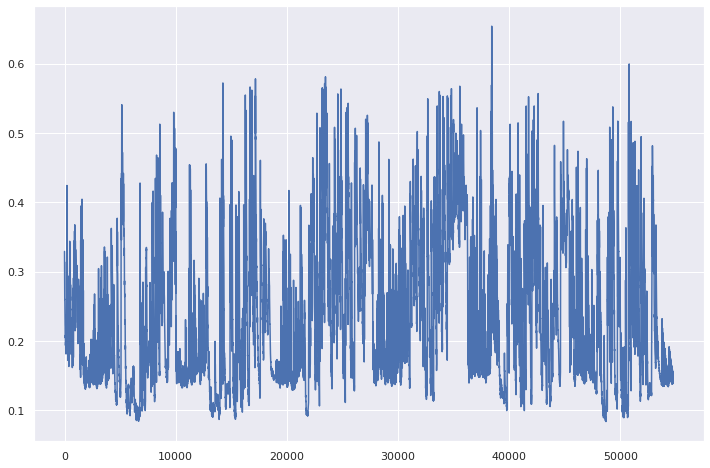

In [9]:
df = pd.read_hdf("data/df.h5", "thetaliq0001")
df['10.000000 '].plot()